# Predicting Scope 1 CO$_{2}$ Emissions Based on Company Data

In [14]:
import pandas as pd 

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

Numer of sectors: 56
<br>
Number of companies: 14958
<br>
Number of values (including missing values): 18603504
<br>
Missing values: 67.8%  
Number of columns: 184

<b> PREPROCESSING </b>

Features that don’t relate to CO$_{2}$ emissions were removed.
<br>
These are mainly features found under the category ‘Workforce’:
<br>

In [16]:
#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)

Number of columns in cleaned dataset: 102

<b> MISSING VALUES </b>

To avoid a biased model and discarding missing values, these were filled per company with the Iterative Imputation method:


,organization_id,StatementDetails.FinancialPeriodFiscalYear,EmissionDataPoints.CO2EquivalentsEmissionDirectScope1,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal
0,66,2009,83134.00,86960.0
1,66,2010,53354.10,57370.0
2,66,2011,79268.75,81940.0
3,66,2012,NaN,88421.0
4,66,2013,NaN,84278.0
5,66,2014,NaN,66747.0
6,66,2015,NaN,39805.0
7,66,2016,127.00,1592.0
8,66,2017,156.00,1739.0
9,66,2018,569.00,2107.0


,0,1,2,3
0,66.0,2009.0,83134.000000,86960.0
1,66.0,2010.0,53354.100000,57370.0
2,66.0,2011.0,79268.750000,81940.0
3,66.0,2012.0,84710.494124,88421.0
4,66.0,2013.0,80665.656243,84278.0
5,66.0,2014.0,63549.994309,66747.0
6,66.0,2015.0,37246.288964,39805.0
7,66.0,2016.0,127.000000,1592.0
8,66.0,2017.0,156.000000,1739.0
9,66.0,2018.0,569.000000,2107.0


<AxesSubplot:title={'center':'Iterative Imputation'}, xlabel='Year', ylabel='CO2 emission in tonnes'>

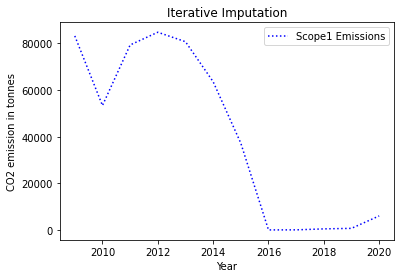

In [13]:
import matplotlib.pyplot as plt
import numpy as np

df_numeric = df1.apply(pd.to_numeric, args=('coerce',))

#sort values by year
df2 = df_numeric.sort_values(by='StatementDetails.FinancialPeriodFiscalYear')

#choose a company 
df3 = df2.loc[df["organization_id"] == 66]

emissions_per_company = df3.groupby(["organization_id", "StatementDetails.FinancialPeriodFiscalYear"])[["EmissionDataPoints.CO2EquivalentsEmissionDirectScope1", "EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal"
]].sum(min_count=1).reset_index()

#display for which years scope 1 values are missing
display(emissions_per_company)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#fill missing values with iterative imputer
imp_mean = IterativeImputer(random_state = 0)
imp_mean.fit(emissions_per_company)

#new data set with filled missing values
pred_df = pd.DataFrame(imp_mean.transform(emissions_per_company))

#display the predicted values
display(pred_df)

#plot scope 1 values for company
pred_df.plot(x = 1, 
        y = 2, title='Iterative Imputation', color='blue', linestyle='dotted', xlabel='Year', ylabel='CO2 emission in tonnes', label='Scope1 Emissions')


